# 0.3.5 Curva de validación

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../../../../") 

import utils.paths as path
from utils.paths2 import direcciones

Esta curva que permite evaluar la variación en el desempeño de un modelo (dilema bias-variance) al variar un único hiperparámetro.

In [4]:
#
# Carga de datos
#
X, y = load_digits(return_X_y=True)

#
# Variación del parámetro. Toma 5 valores del parámetro.
#
param_range = np.logspace(-6, 1, 5)

#
# train_scores: Scores on training sets.
# test_scores: Scores on test set.
#
train_scores, test_scores = validation_curve(
    # -------------------------------------------------------------------------
    # An object of that type which is cloned for each validation.
    estimator=SVC(),
    # -------------------------------------------------------------------------
    # Training vector
    X=X,
    # -------------------------------------------------------------------------
    # Target relative to X for classification or regression.
    y=y,
    # -------------------------------------------------------------------------
    # Name of the parameter that will be varied.
    # -------------------------------------------------------------------------
    param_name="gamma",
    # -------------------------------------------------------------------------
    # The values of the parameter that will be evaluated.
    param_range=param_range,
    # -------------------------------------------------------------------------
    # Determines the cross-validation splitting strategy.
    cv=5,
    # -------------------------------------------------------------------------
    # A str (see model evaluation documentation) or a scorer callable object
    scoring="accuracy",
)

In [5]:
#
# Resultados de aplicar CV=5 por cada valor del training set
#
train_scores

array([[0.10229645, 0.10229645, 0.1961057 , 0.19332406, 0.18984701],
       [0.96798887, 0.97703549, 0.97079277, 0.96801113, 0.98052851],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

In [6]:
#
# Resultados de aplicar CV=5 por cada valor del test set
#
test_scores

array([[0.1       , 0.1       , 0.20334262, 0.19777159, 0.18662953],
       [0.925     , 0.91944444, 0.96100279, 0.97214485, 0.89415042],
       [0.95555556, 0.925     , 0.9637883 , 0.98328691, 0.94150418],
       [0.1       , 0.1       , 0.10306407, 0.10306407, 0.10306407],
       [0.1       , 0.1       , 0.10584958, 0.10027855, 0.10027855]])

In [7]:
#
# Medias y desviaciones estándar para los scores
#
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

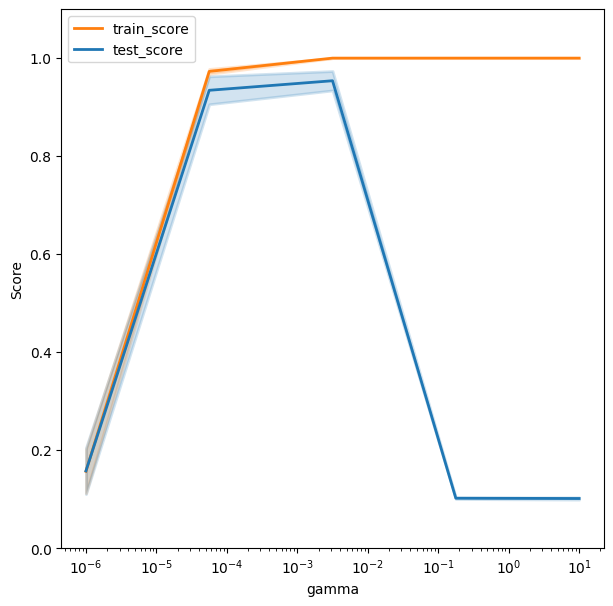

In [8]:
plt.figure(figsize=(7, 7))

plt.semilogx(
    param_range, train_scores_mean, label="train_score", color="tab:orange", lw=2
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="tab:orange",
    lw=2,
)

plt.semilogx(param_range, test_scores_mean, label="test_score", color="tab:blue", lw=2)

plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="tab:blue",
    lw=2,
)

plt.ylim(0.0, 1.1)
plt.legend(loc="best")

plt.xlabel("gamma")
plt.ylabel("Score")
plt.show()

#
# Si los scores de entrenamiento y valiación son bajos, el modelo puede
# esta sub-ajustado.
#
# Si el score de entrenamiento es alto y el de validación es bajo, el
# modelo se encuentra sobre-entrenado
#

In [ ]:
print('ok_')